In [17]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime

def scale(data, column, train_mean, train_std):
    return (data - train_mean[column]) / train_std[column]

def descale(data, column, train_mean, train_std):
    return (data * train_std[column]) + train_mean[column]

def plot_graphs(datasetName):

    mpl.rcParams['figure.figsize'] = (12, 10)
    mpl.rcParams['axes.grid'] = False
    dataset = pd.read_csv(f"./datasets/final/final-formed-{datasetName}.csv", delimiter=',', date_format='%Y-%m-%d %H:%M:%S', parse_dates=['Timestamp'])

    date_time = pd.to_datetime(dataset['Timestamp'], format='%Y-%m-%d %H:%M:%S')

    dataset.drop('Timestamp', axis=1, inplace=True)

    dataset.drop(['cosMonth', 'sinMonth'], axis=1, inplace=True)
    dataset.describe()
    plot_cols = ['CPUTime', 'Memory', 'NJobs', 'NProcs', 'ArrivedJobs', 'CompletedJobs']

    plot_features = dataset[plot_cols][:8760]
    plot_features.index = date_time[:8760]
    _ = plot_features.plot(subplots=True)
    column_indices = {name: i for i, name in enumerate(dataset.columns)}
    # save the figure
    plt.savefig(f"./graphs/{datasetName}-plot_features.png")
    
    n = len(dataset)
    train_df = dataset[int(n*0):int(n*0.8)]
    test_df = dataset[int(n*0.8):int(n*1.0)]

    num_features = dataset.shape[1]
    train_df.head()
    print(train_df.describe().transpose())
    train_mean = train_df.mean()
    train_std = train_df.std()

    # train_df = scale(train_df, train_df.columns)
    train_df.head()
    train_df = scale(train_df, train_df.columns, train_mean, train_std)
    df_std = train_df.melt(var_name='Column', value_name='Normalized')
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
    _ = ax.set_xticklabels(dataset.keys(), rotation=90)
    train_df = descale(train_df, train_df.columns, train_mean, train_std)
    plt.savefig(f"./graphs/{datasetName}-plot_distibrutions.png")
    plt.show()

    #correlation matrix for dataset
    corrMatrix = train_df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.savefig(f"./graphs/{datasetName}-plot_correlation.png")
    plt.show()

    #save the 4 figures



                count          mean           std       min           25%   
CPUTime        7008.0  1.961011e+07  1.293042e+07  0.000000  9.380714e+06  \
Memory         7008.0  1.568897e+08  1.057299e+08  0.000000  5.414695e+07   
NJobs          7008.0  3.136203e+02  1.720531e+02  0.000000  1.650000e+02   
NProcs         7008.0  3.136203e+02  1.720531e+02  0.000000  1.650000e+02   
ArrivedJobs    7008.0  3.276869e+01  4.068124e+01  0.000000  7.000000e+00   
CompletedJobs  7008.0  3.268550e+01  3.534041e+01  0.000000  1.100000e+01   
cosHour        7008.0 -5.348335e-17  7.071572e-01 -1.000000 -7.071068e-01   
sinHour        7008.0 -1.267378e-17  7.071572e-01 -1.000000 -7.071068e-01   
cosDay         7008.0 -1.904814e-01  6.579294e-01 -0.999963 -8.090170e-01   
sinDay         7008.0  1.356974e-01  7.159378e-01 -0.999991 -6.016241e-01   

                        50%           75%           max  
CPUTime        2.012375e+07  2.728363e+07  7.573649e+07  
Memory         1.667062e+08  2.38406

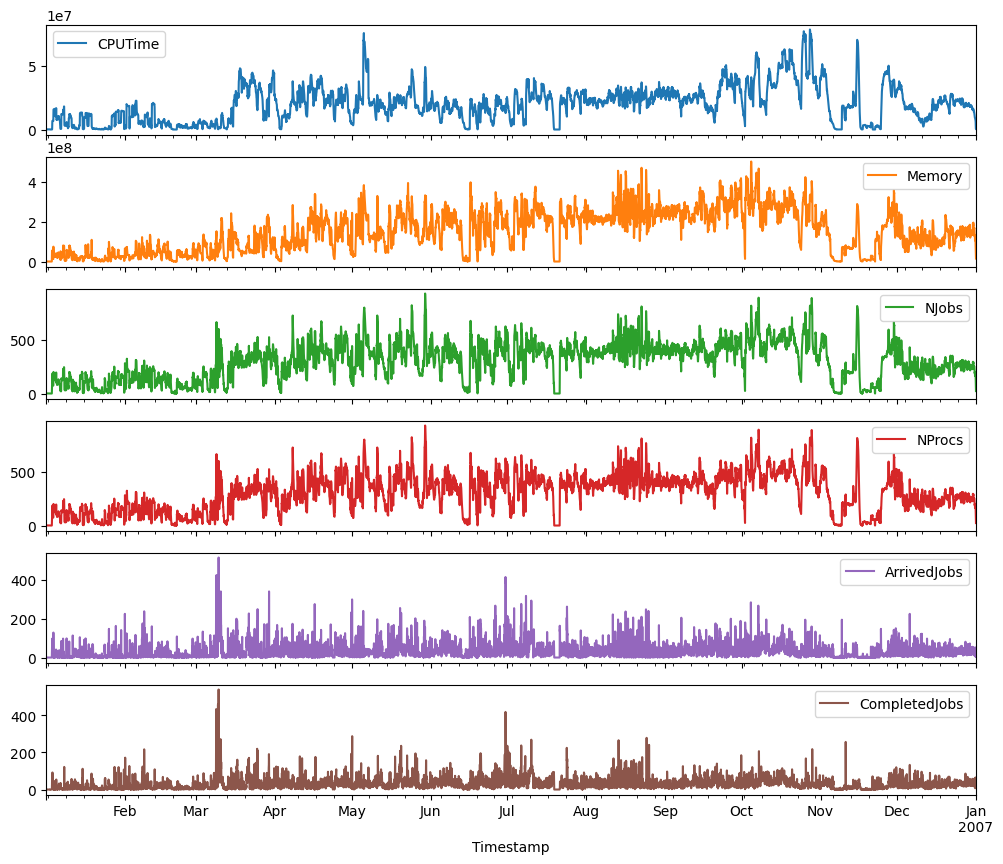

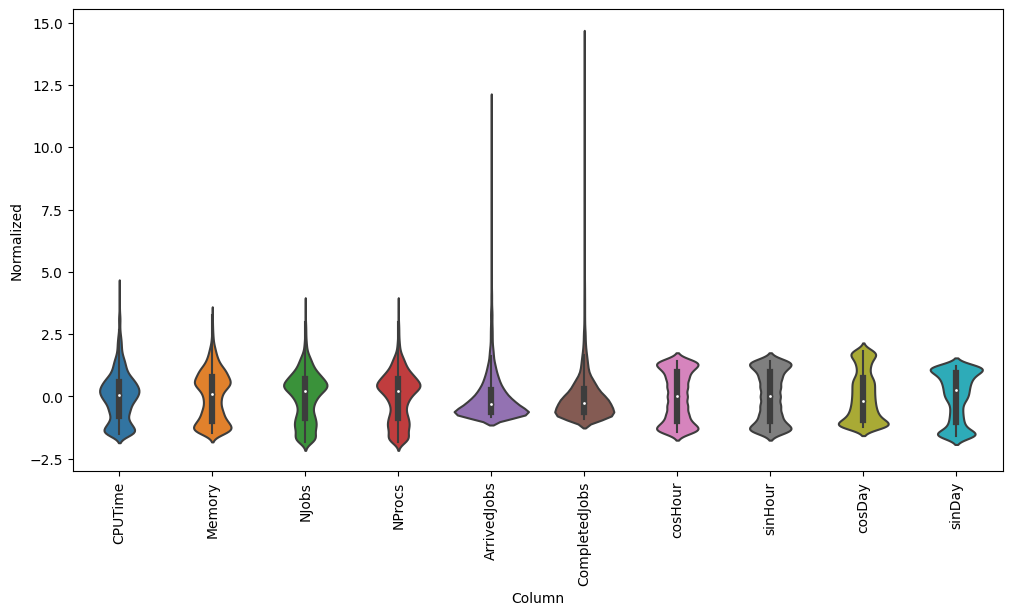

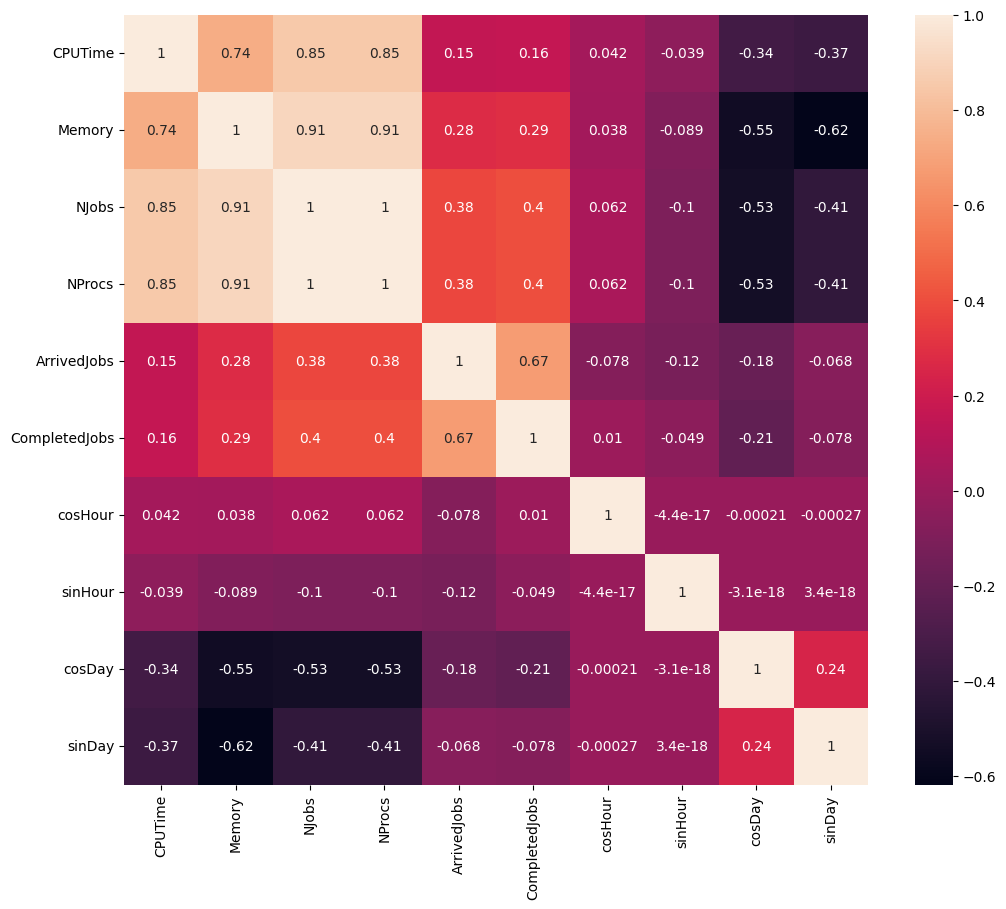

                 count          mean           std       min           25%   
CPUTime        12648.0  3.948784e+03  4.288424e+04  0.000000      0.190000  \
Memory         12648.0  3.588713e+06  4.797362e+07  0.000000  36614.197333   
NJobs          12648.0  7.476676e+01  1.656068e+02  0.000000      7.000000   
NProcs         12648.0  3.059022e+02  4.797459e+02  0.000000     37.000000   
ArrivedJobs    12648.0  6.789073e+01  1.628291e+02  0.000000      4.000000   
CompletedJobs  12648.0  6.788947e+01  1.612169e+02  0.000000      4.000000   
cosHour        12648.0 -5.266713e-17  7.071347e-01 -1.000000     -0.707107   
sinHour        12648.0 -1.193788e-17  7.071347e-01 -1.000000     -0.707107   
cosDay         12648.0 -1.462625e-01  6.905786e-01 -0.999963     -0.838280   
sinDay         12648.0  1.603472e-01  6.899802e-01 -0.999991     -0.455907   

                        50%            75%           max  
CPUTime        1.195000e+00       3.165521  2.426551e+06  
Memory         1.892260

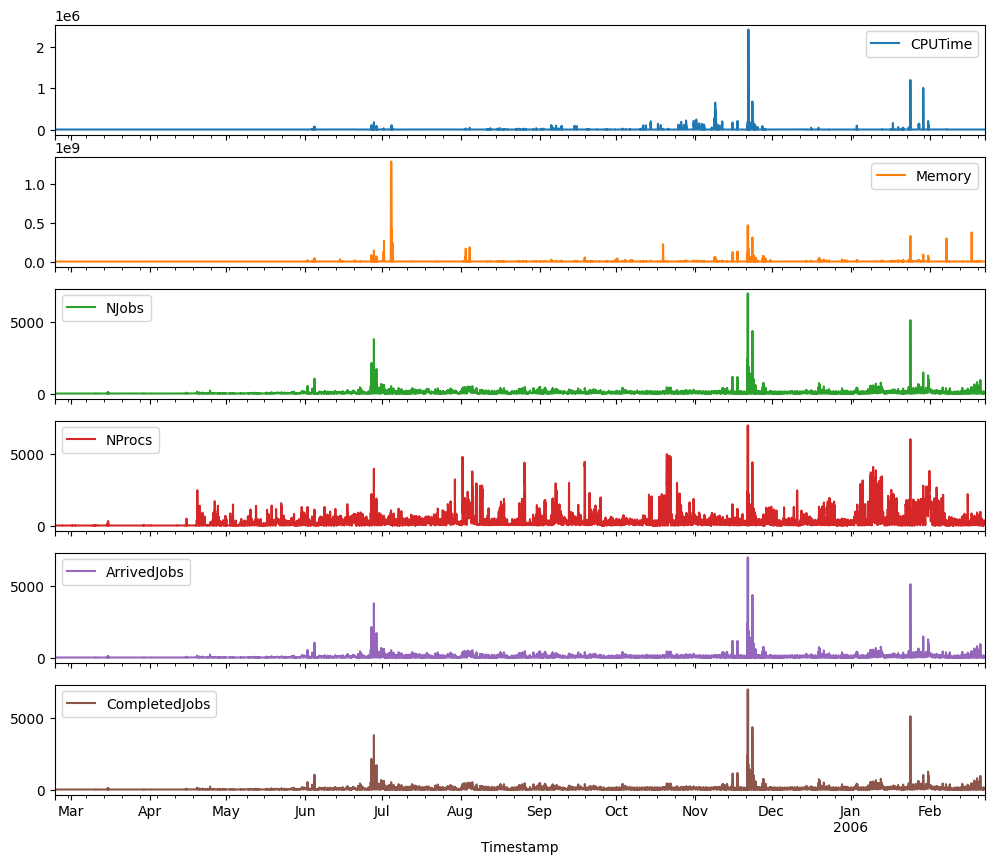

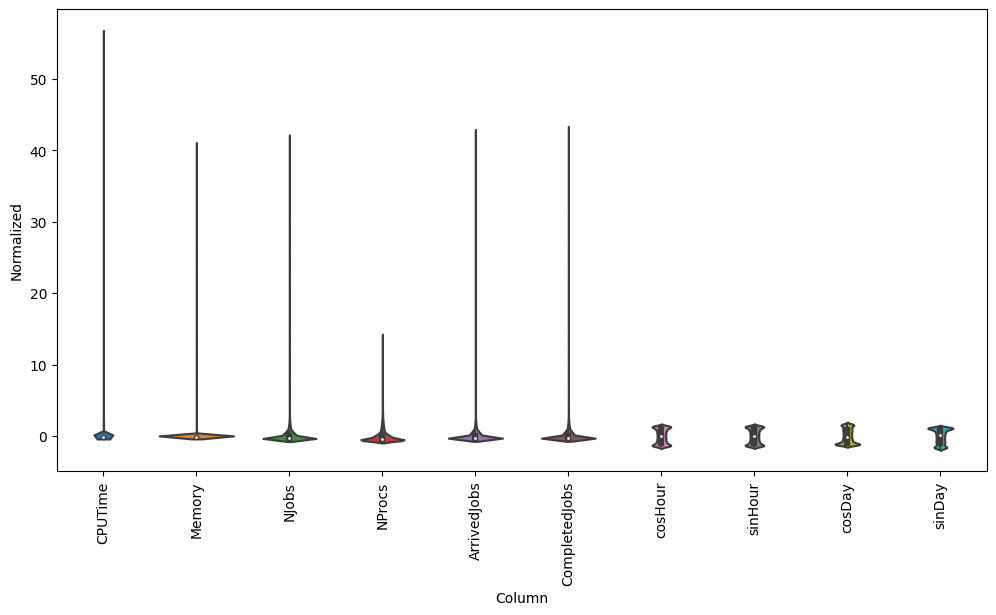

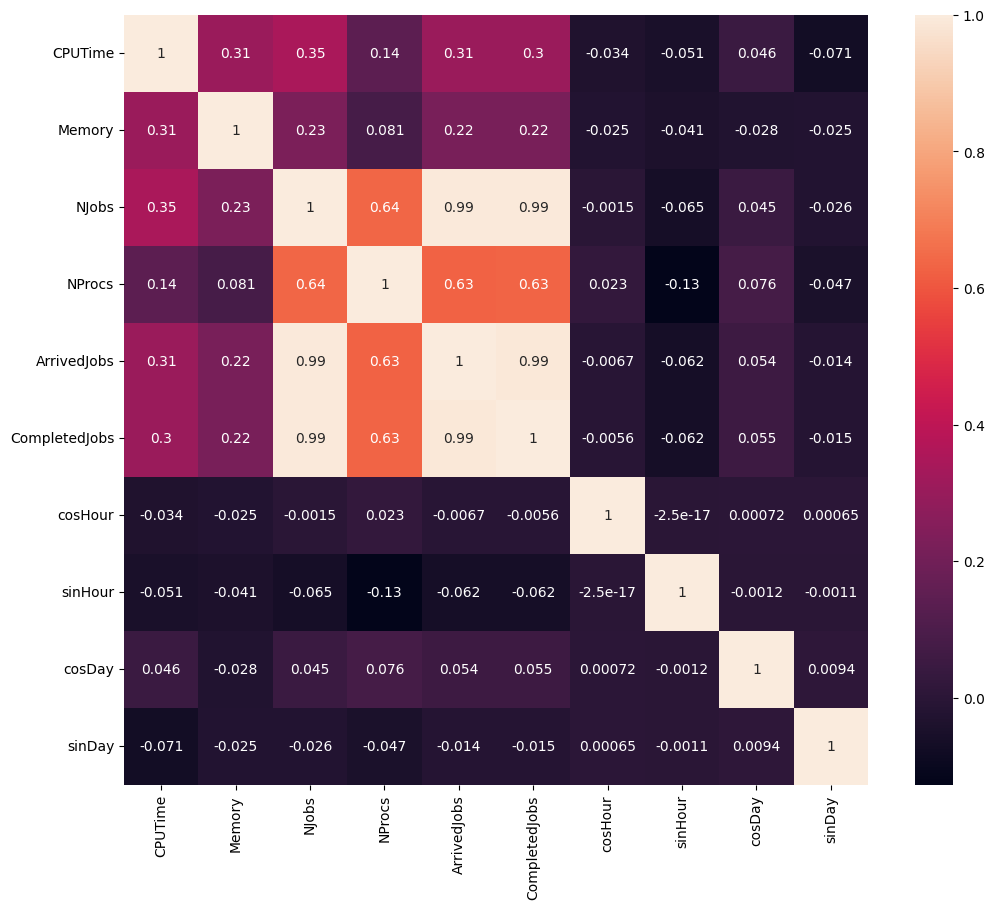

                count          mean           std       min           25%   
CPUTime        7507.0  2.137409e+08  3.253036e+08  0.000000  3.680571e+06  \
Memory         7507.0  1.028800e+08  2.260720e+08  0.000000  6.234914e+06   
NJobs          7507.0  6.439867e+02  1.127596e+03  0.000000  2.800000e+01   
NProcs         7507.0  1.892868e+03  2.058174e+03  0.000000  2.020000e+02   
ArrivedJobs    7507.0  7.924590e+01  4.906709e+02  0.000000  0.000000e+00   
CompletedJobs  7507.0  7.886319e+01  4.235852e+02  0.000000  1.000000e+00   
cosHour        7507.0 -6.001044e-04  7.070014e-01 -1.000000 -7.071068e-01   
sinHour        7507.0 -1.607975e-04  7.073061e-01 -1.000000 -7.071068e-01   
cosDay         7507.0 -1.306382e-01  6.785203e-01 -0.999963 -7.775971e-01   
sinDay         7507.0  9.469659e-02  7.167330e-01 -0.999991 -6.551564e-01   

                        50%           75%           max  
CPUTime        1.405139e+07  3.458960e+08  2.806580e+09  
Memory         4.906184e+07  1.06321

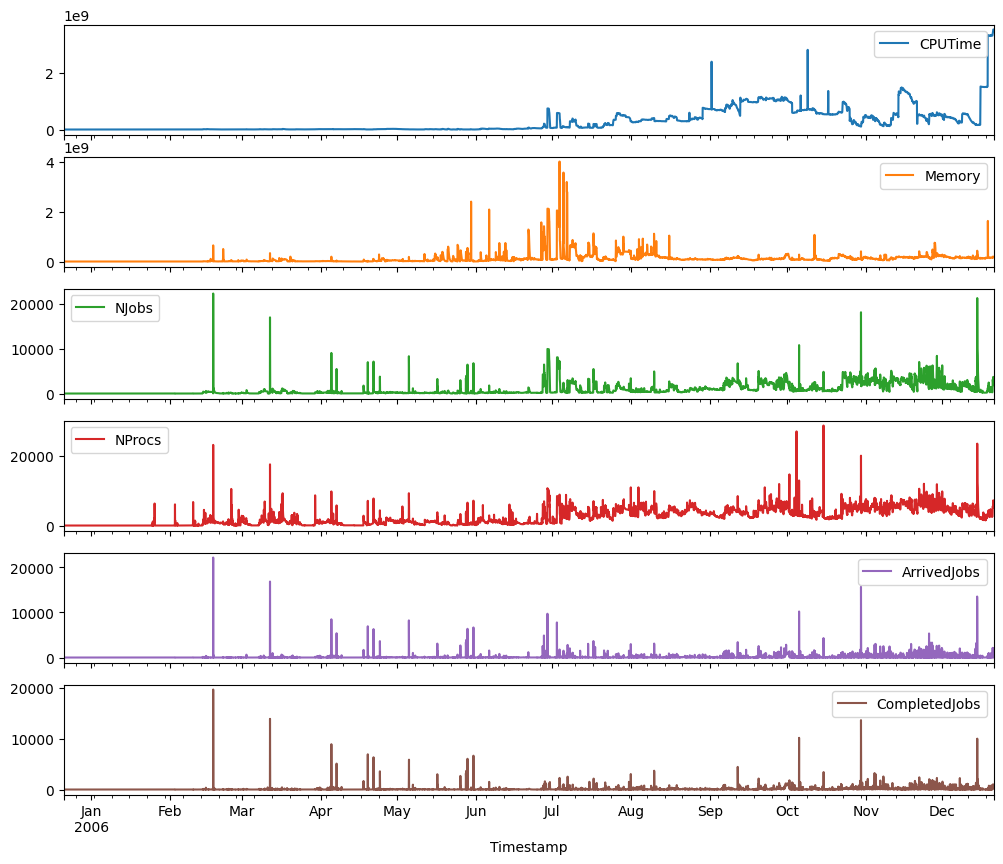

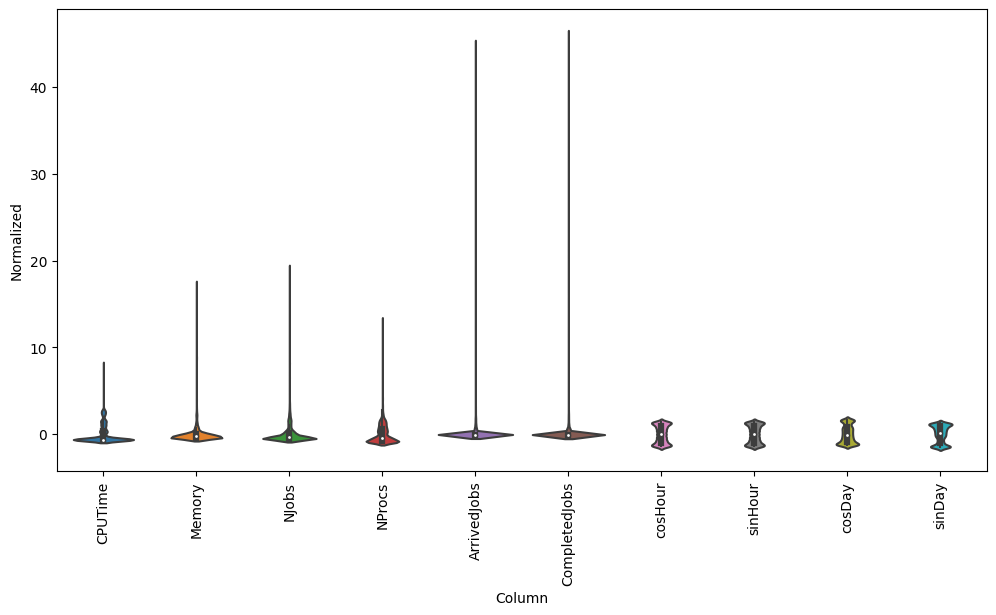

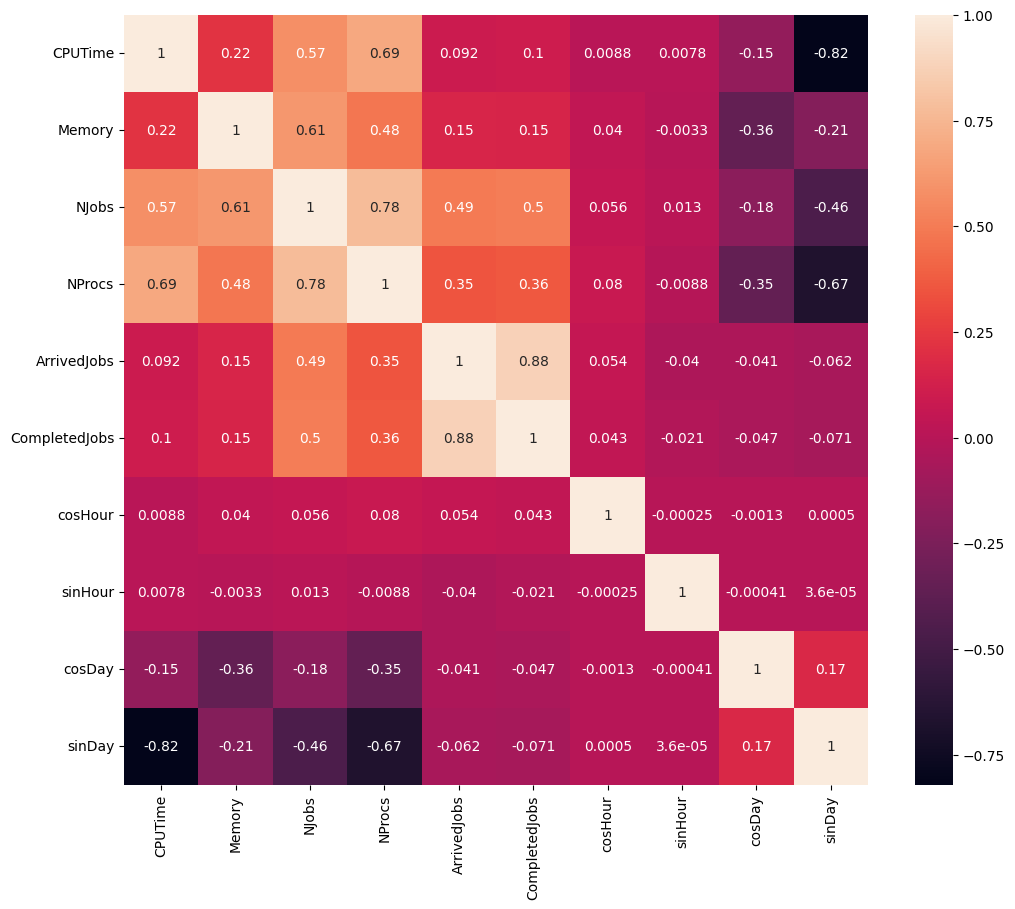

                 count          mean           std           min   
CPUTime        28032.0  9.705976e+05  1.468651e+05  6.384567e+05  \
Memory         28032.0  1.420456e+08  2.055760e+07  8.667138e+07   
NJobs          28032.0  1.976173e+02  3.330044e+01  1.014214e+02   
NProcs         28032.0  1.195555e+03  6.099789e+02  1.172529e+02   
ArrivedJobs    28032.0  9.999964e+00  3.178734e+00  0.000000e+00   
CompletedJobs  28032.0  8.009097e+00  2.846085e+00  0.000000e+00   
cosHour        28032.0 -5.322987e-17  7.071194e-01 -1.000000e+00   
sinHour        28032.0 -1.368768e-17  7.071194e-01 -1.000000e+00   
cosDay         28032.0  4.759617e-02  7.109482e-01 -9.999630e-01   
sinDay         28032.0  3.397343e-02  7.008342e-01 -9.999907e-01   

                        25%           50%           75%           max  
CPUTime        8.938285e+05  9.615801e+05  1.035511e+06  6.383701e+06  
Memory         1.295582e+08  1.410016e+08  1.533558e+08  9.550513e+08  
NJobs          1.746223e+02  1.9537

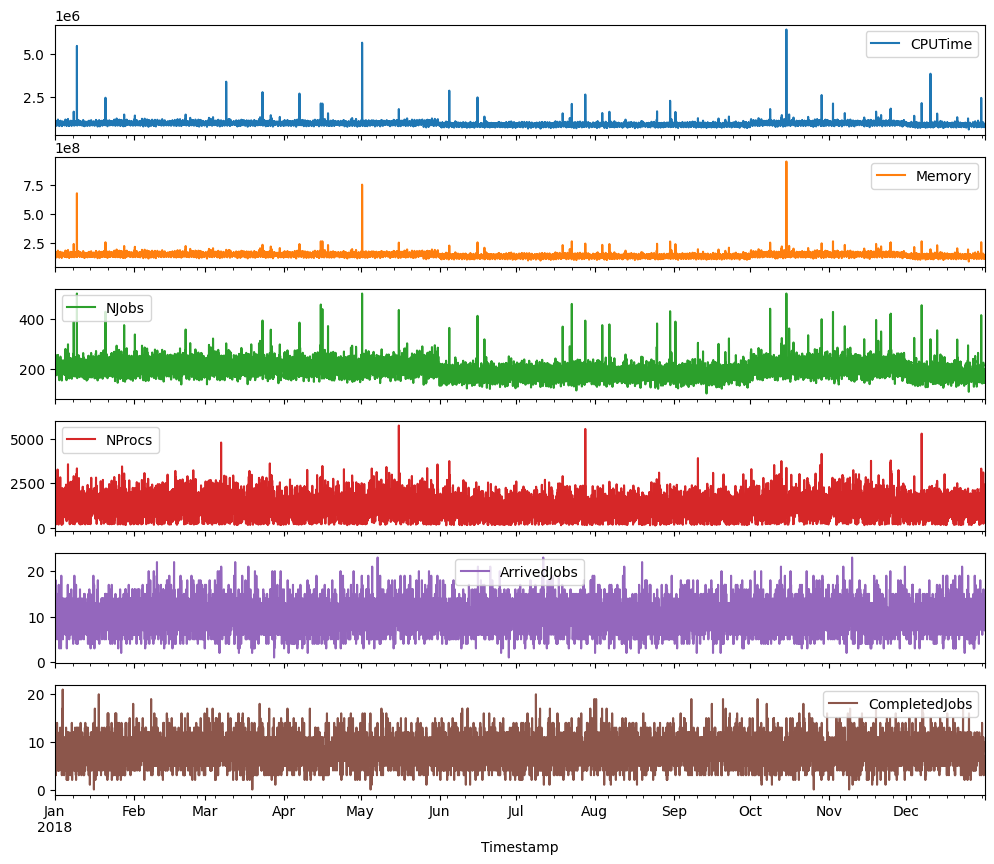

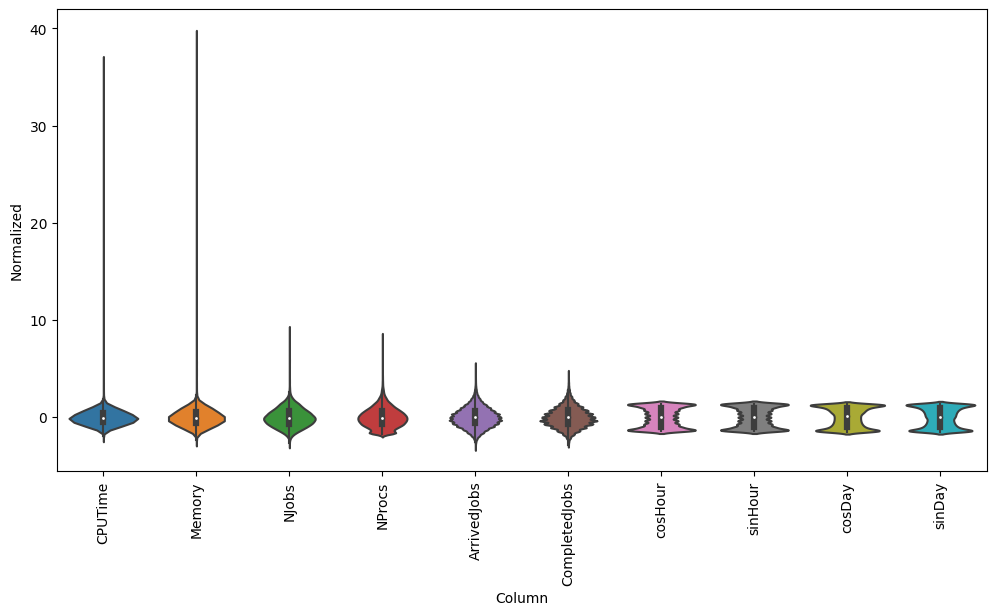

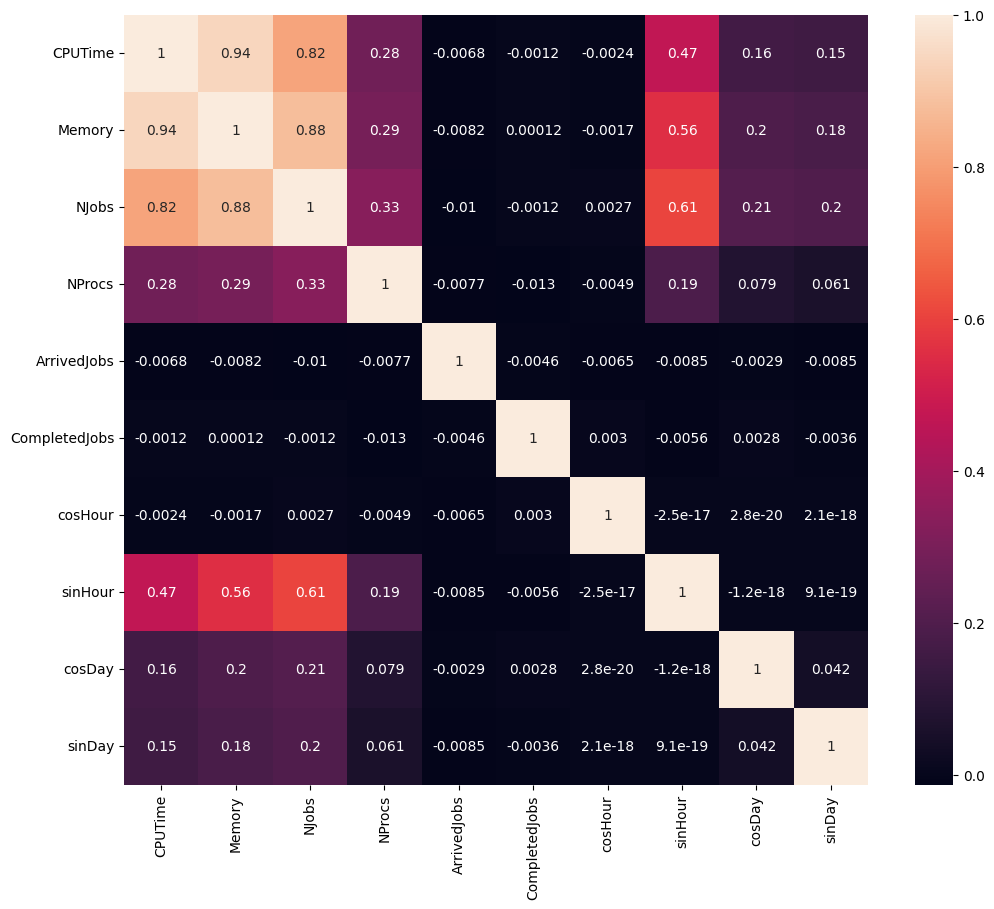

In [18]:
plot_graphs('auvergrid')
plot_graphs('das2')
plot_graphs('sharcnet')
plot_graphs('synthetic')

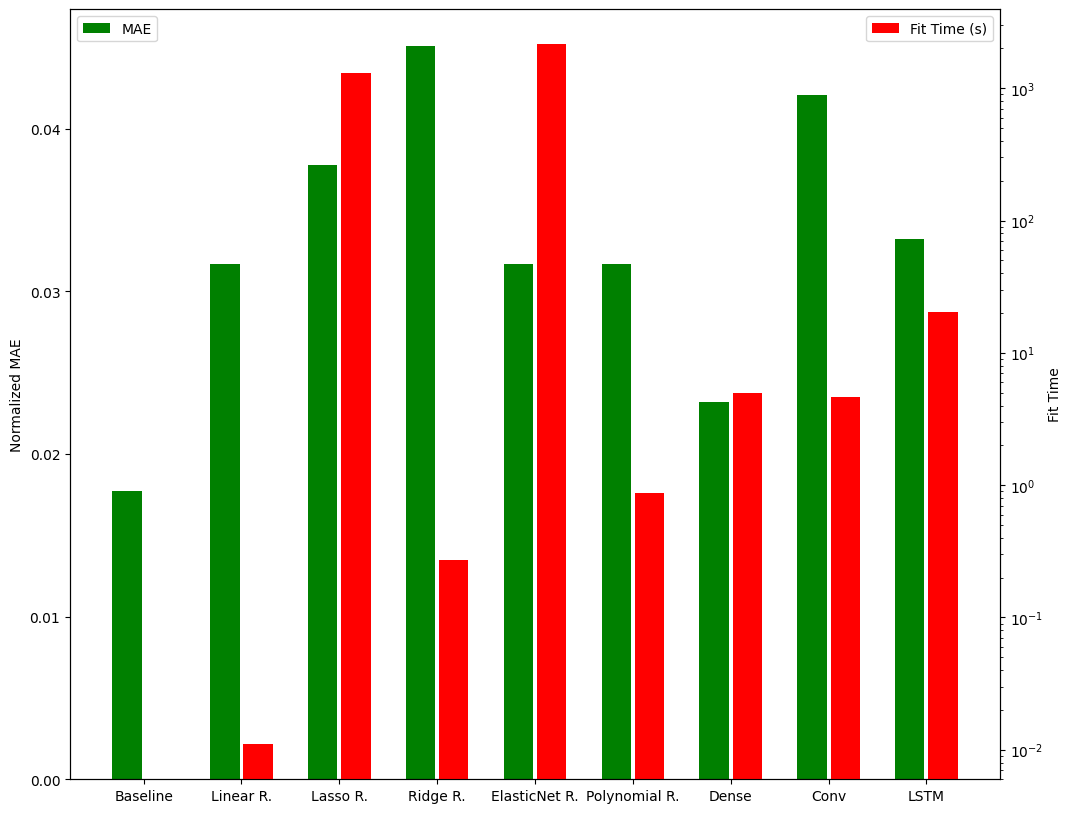

In [20]:
performance = {}
fitTimes = {}

performance['Baseline'] = [0.0177]
performance['Linear R.'] = [0.0317]
performance['Lasso R.'] = [0.0378]
performance['Ridge R.'] = [0.0451]
performance['ElasticNet R.'] = [0.0317]
performance['Polynomial R.'] = [0.0317]
performance['Dense'] = [0.0232]
performance['Conv'] = [0.0421]
performance['LSTM'] = [0.0332]

fitTimes['Baseline'] = 0.0
fitTimes['Linear R.'] = 0.011
fitTimes['Lasso R.'] = 1294.67
fitTimes['Ridge R.'] = 0.274
fitTimes['ElasticNet R.'] = 2150.64
fitTimes['Polynomial R.'] = 0.879
fitTimes['Dense'] = 4.95
fitTimes['Conv'] = 4.64
fitTimes['LSTM'] = 20.388


x = np.arange(len(performance))
width = 0.3
fit = fitTimes.values()
test_mae = [v[0] for v in performance.values()]

fig, ax1 = plt.subplots()
ax1.set_ylabel('Normalized MAE')
ax1.bar(x - 0.17, test_mae, width, label='MAE', color='g')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.set_ylabel('Fit Time')
ax2.bar(x + 0.17, fit, width, label='Fit Time (s)', color='r')
ax2.set_yscale('log')
ax2.legend(loc='upper right')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=90)
pass
